In [12]:
# Cell 1: Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, classification_report

# Set seaborn style for plots
sns.set(style="whitegrid")


In [13]:
def clean_column_names(df):
    df.columns = df.columns.str.strip().str.replace(" ", "_").str.replace("-", "_")
    return df

df1 = clean_column_names(pd.read_csv("datasets/hudco_dwelling_approved_cumulative.csv"))
df2 = clean_column_names(pd.read_csv("datasets/hudco_dwelling_approved_residential.csv"))
df3 = clean_column_names(pd.read_csv("datasets/hudco_projects_approved_cumulative.csv"))
df4 = clean_column_names(pd.read_csv("datasets/Table_4_1_a.csv"))
df5 = clean_column_names(pd.read_csv("datasets/Table_5_7.csv"))
df6 = clean_column_names(pd.read_csv("datasets/Table_5_8.csv"))

In [14]:
df1.head()

,Particulars,03_2008,03_2009,03_2011,03_2012,03_2013
0,Total,13718172.0,13826198.0,14300420.0,14736146.0,15090378.0
1,Andaman and Nicobar Islands,534.0,534.0,534.0,534.0,534.0
2,Andhra Pradesh,2446387.0,2443336.0,2449772.0,2449772.0,2467916.0
3,Arunachal Pradesh,1822.0,1822.0,1822.0,1822.0,1822.0
4,Assam,57130.0,57163.0,56298.0,56249.0,56249.0


In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Particulars  34 non-null     object 
 1   03_2008      34 non-null     float64
 2   03_2009      34 non-null     float64
 3   03_2011      34 non-null     float64
 4   03_2012      34 non-null     float64
 5   03_2013      34 non-null     float64
dtypes: float64(5), object(1)
memory usage: 1.7+ KB


In [16]:
df2.head()

,Particulars,03_2005,03_2006,03_2007,03_2008,03_2009,03_2010,12_2010,03_2011,06_2011,09_2011,12_2011,03_2012,06_2012,09_2012,12_2012,03_2013,06_2013,09_2013,03_2014
0,Residential Total,1119742.0,192197.0,140970.0,98868.0,114009.0,297907.0,NaN,295732.0,NaN,NaN,NaN,422524.0,NaN,NaN,NaN,439286.0,NaN,NaN,1434102.0
1,Residential: Economically Weaker Section,NaN,NaN,118371.0,80490.0,103226.0,229568.0,NaN,241225.0,NaN,NaN,NaN,406934.0,NaN,NaN,NaN,406333.0,NaN,NaN,1410942.0
2,Residential: Lower Income Group,NaN,NaN,612.0,2772.0,327.0,7.0,NaN,35094.0,NaN,NaN,NaN,272.0,NaN,NaN,NaN,18962.0,NaN,NaN,1020.0
3,Residential: Middle Income Group,NaN,NaN,432.0,892.0,682.0,52662.0,NaN,13712.0,NaN,NaN,NaN,4324.0,NaN,NaN,NaN,3295.0,NaN,NaN,6086.0
4,Residential: Higher Income Group,NaN,NaN,20357.0,13744.0,9072.0,15091.0,NaN,5229.0,NaN,NaN,NaN,10994.0,NaN,NaN,NaN,5772.0,NaN,NaN,15910.0


In [17]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Particulars  6 non-null      object 
 1   03_2005      1 non-null      float64
 2   03_2006      1 non-null      float64
 3   03_2007      6 non-null      float64
 4   03_2008      6 non-null      float64
 5   03_2009      6 non-null      float64
 6   03_2010      6 non-null      float64
 7   12_2010      0 non-null      float64
 8   03_2011      6 non-null      float64
 9   06_2011      0 non-null      float64
 10  09_2011      0 non-null      float64
 11  12_2011      0 non-null      float64
 12  03_2012      6 non-null      float64
 13  06_2012      0 non-null      float64
 14  09_2012      0 non-null      float64
 15  12_2012      0 non-null      float64
 16  03_2013      6 non-null      float64
 17  06_2013      0 non-null      float64
 18  09_2013      0 non-null      float64
 19  03_2014     

In [18]:
df3.head()

,Particulars,03_2008,03_2009,03_2010,03_2011,03_2012,03_2013
0,Total,16026.0,16183.0,NaN,16337.0,16443.0,16537.0
1,Andaman and Nicobar Islands,16.0,16.0,NaN,16.0,16.0,16.0
2,Andhra Pradesh,2118.0,2124.0,NaN,2119.0,2126.0,2132.0
3,Arunachal Pradesh,9.0,9.0,NaN,9.0,9.0,9.0
4,Assam,185.0,189.0,NaN,190.0,190.0,189.0


In [19]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Particulars  34 non-null     object 
 1   03_2008      34 non-null     float64
 2   03_2009      34 non-null     float64
 3   03_2010      0 non-null      float64
 4   03_2011      34 non-null     float64
 5   03_2012      34 non-null     float64
 6   03_2013      34 non-null     float64
dtypes: float64(6), object(1)
memory usage: 2.0+ KB


In [20]:
df4.head()

,State,Habitations_with_1000+_Population___Habitations_Covered_(No.s)___Target,Habitations_with_1000+_Population___Habitations_Covered_(No.s)___Achievement,Habitations_with_1000+_Population___Length_(KM)___Target,Habitations_with_1000+_Population___Length_(KM)___Achievement,Habitations_with_500+_Population___Habitations_Covered_(No.)___Target,Habitations_with_500+_Population___Habitations_Covered_(No.)___Achievement,Habitations_with_500+_Population___Length_(KM)___Target,Habitations_with_500+_Population___Length_(KM)___Achievement
0,Assam,1571.0,822.0,4909.25,1675.00,893.0,197.0,NaN,NaN
1,Bihar,133.0,25.0,340.12,102.30,24.0,5.0,30.00,6.50
2,Gujarat,NaN,9.0,NaN,NaN,NaN,572.0,NaN,852.79
3,Himachal Pradesh,944.0,899.0,3925.72,5024.00,NaN,NaN,NaN,NaN
4,Kerala,6.0,31.0,13.60,49.25,55.0,57.0,95.97,79.57


In [21]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 9 columns):
 #   Column                                                                        Non-Null Count  Dtype  
---  ------                                                                        --------------  -----  
 0   State                                                                         9 non-null      object 
 1   Habitations_with_1000+_Population___Habitations_Covered_(No.s)___Target       7 non-null      float64
 2   Habitations_with_1000+_Population___Habitations_Covered_(No.s)___Achievement  9 non-null      float64
 3   Habitations_with_1000+_Population___Length_(KM)___Target                      7 non-null      float64
 4   Habitations_with_1000+_Population___Length_(KM)___Achievement                 8 non-null      float64
 5   Habitations_with_500+_Population___Habitations_Covered_(No.)___Target         5 non-null      float64
 6   Habitations_with_500+_Population___Habi

In [22]:
df5.head()

,State,No._of_Habitations_Selected_for_the_Study,Utilised_Tested_and_Quality_Materials,Not_utilised_Tested_and_Quality_Materials,Quality_and_Quantity_of_Materials_used_by_the_Contractor___Not_up_the_Standard/lack_of_Thickness,Quality_and_Quantity_of_Materials_used_by_the_Contractor___Used_Inadequate_Quantity_of_Black_Tapping,Quality_and_Quantity_of_Materials_used_by_the_Contractor___Used_substandard_Quality_Cement/_Bricks_instead_of_Stones
0,Assam,20,12.0,4.0,4.0,2.0,0.0
1,Bihar,18,10.0,8.0,7.0,0.0,1.0
2,Gujarat,20,12.0,5.0,2.0,0.0,1.0
3,Himachal Pradesh,20,19.0,1.0,0.0,0.0,0.0
4,Kerala,20,18.0,0.0,0.0,0.0,0.0


In [23]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column                                                                                                                Non-Null Count  Dtype  
---  ------                                                                                                                --------------  -----  
 0   State                                                                                                                 9 non-null      object 
 1   No._of_Habitations_Selected_for_the_Study                                                                             9 non-null      int64  
 2   Utilised_Tested_and_Quality_Materials                                                                                 9 non-null      float64
 3   Not_utilised_Tested_and_Quality_Materials                                                                             9 non-null      float64
 4   Quality_and_Q

In [24]:
df6.head()

,State,No._of_Inspections_conducted_by_State_Level_Monitors_(SQM)_Independent_of_executive_Agency_deployed_under_Bharat_Nirman_Programme_as_reported_by:_State_Level_Authorities:_2005_06,State_Level_Authorities:_2006_07,Quality_Observed_in_Both_Years_by_State_Level_Monitors:_Good,Quality_Observed_in_Both_Years_by_State_Level_Monitors:_Satisfactory,Quality_Observed_in_Both_Years_by_State_Level_Monitors:_Work_is_going_on_as_per_the_Specifications,District_Level_Authorities:_2005_06,District_Level_Authorities:_2006_07,Block_Level_Authorities:_2005_06,Block_Level_Authorities:_2006_07
0,Assam,551,513,NaN,NaN,1.0,86,2,23,3
1,Bihar,164,189,NaN,1.0,NaN,12,15,0,0
2,Gujarat,345,229,NaN,1.0,NaN,79,45,31,16
3,Himachal Pradesh,249,163,1.0,NaN,NaN,34,36,7,10
4,Kerala,57,42,NaN,1.0,NaN,1,1,0,0


In [25]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 10 columns):
 #   Column                                                                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                                                                              --------------  -----  
 0   State                                                                                                                                                                               8 non-null      object 
 1   No._of_Inspections_conducted_by_State_Level_Monitors_(SQM)_Independent_of_executive_Agency_deployed_under_Bharat_Nirman_Programme_as_reported_by:_State_Level_Authorities:_2005_06  8 non-null      int64  
 2   State_Level_Authorities:_2006_07                          

In [26]:
import pandas as pd
import numpy as np

# Load and clean datasets
def clean_column_names(df):
    df.columns = df.columns.str.strip().str.replace(" ", "_").str.replace("-", "_")
    return df

# Load each dataset individually
df1 = clean_column_names(pd.read_csv("datasets/hudco_dwelling_approved_cumulative.csv"))
df2 = clean_column_names(pd.read_csv("datasets/hudco_dwelling_approved_residential.csv"))
df3 = clean_column_names(pd.read_csv("datasets/hudco_projects_approved_cumulative.csv"))
df4 = clean_column_names(pd.read_csv("datasets/Table_4_1_a.csv"))
df5 = clean_column_names(pd.read_csv("datasets/Table_5_7.csv"))
df6 = clean_column_names(pd.read_csv("datasets/Table_5_8.csv"))

# Handle missing values in each dataframe
dfs = [df1, df2, df3, df4, df5, df6]
for i, df in enumerate(dfs, 1):
    df.fillna(df.median(numeric_only=True), inplace=True)
    print(f"DataFrame {i} processed with missing values filled.")


DataFrame 1 processed with missing values filled.
DataFrame 2 processed with missing values filled.
DataFrame 3 processed with missing values filled.
DataFrame 4 processed with missing values filled.
DataFrame 5 processed with missing values filled.
DataFrame 6 processed with missing values filled.


In [27]:
# df4: Calculate compliance ratios based on targets and achievements for 1000+ and 500+ populations
df4['compliance_ratio_1000_pop'] = df4['Habitations_with_1000+_Population___Habitations_Covered_(No.s)___Target'] / df4['Habitations_with_1000+_Population___Habitations_Covered_(No.s)___Achievement']
df4['compliance_ratio_500_pop'] = df4['Habitations_with_500+_Population___Habitations_Covered_(No.)___Achievement'] / df4['Habitations_with_500+_Population___Habitations_Covered_(No.)___Target']
df4.to_csv("datasets/Table_4_1_a_preprocessed.csv", index=False)
# df5: Calculate material quality ratio
df5['quality_material_ratio'] = df5['Utilised_Tested_and_Quality_Materials'] / (df5['Utilised_Tested_and_Quality_Materials'] + df5['Not_utilised_Tested_and_Quality_Materials'])


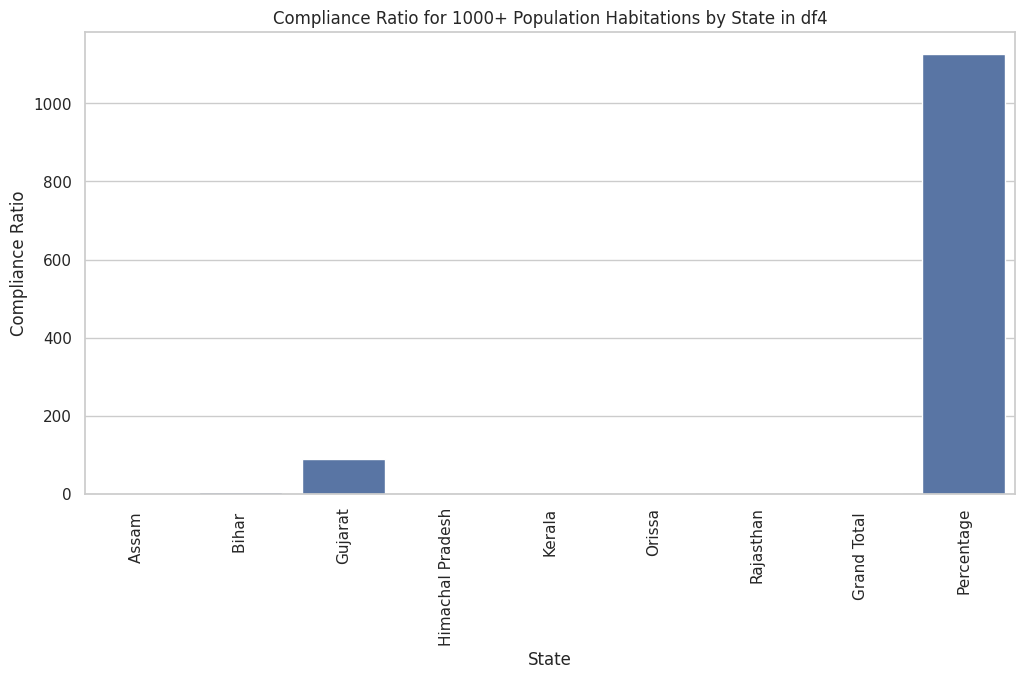

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(x='State', y='compliance_ratio_1000_pop', data=df4)
plt.title('Compliance Ratio for 1000+ Population Habitations by State in df4')
plt.xlabel('State')
plt.ylabel('Compliance Ratio')
plt.xticks(rotation=90)
plt.show()


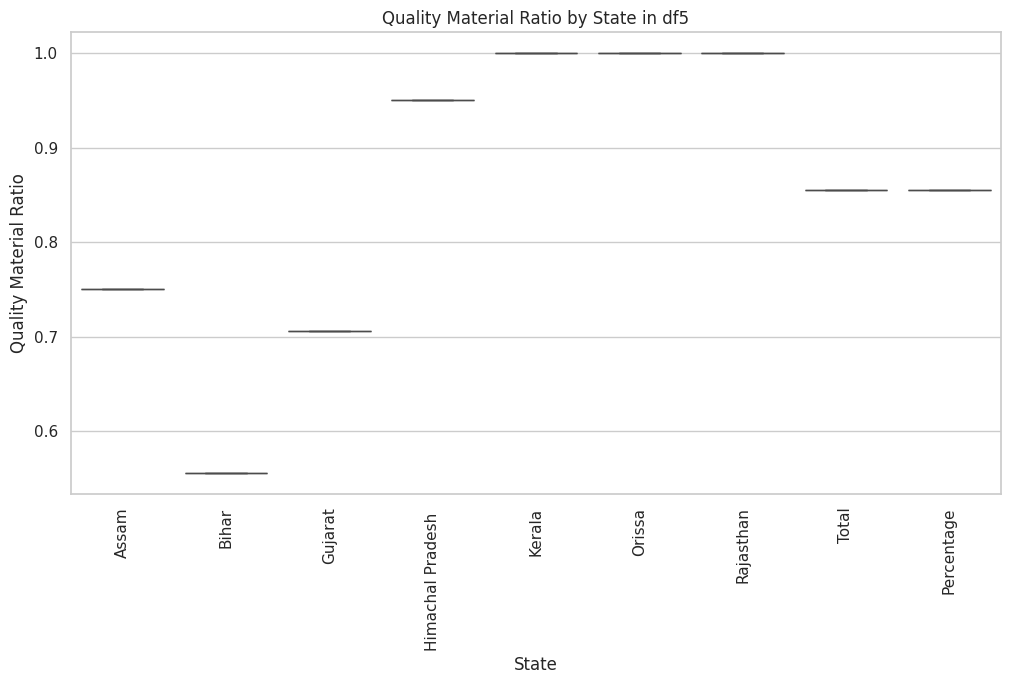

In [29]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='State', y='quality_material_ratio', data=df5)
plt.title('Quality Material Ratio by State in df5')
plt.xlabel('State')
plt.ylabel('Quality Material Ratio')
plt.xticks(rotation=90)
plt.show()


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Label encoding for compliance level in df4 based on 1000 population compliance ratio
df4['Compliance_Level'] = np.where(df4['compliance_ratio_1000_pop'] > 0.8, 1, 0)  # 1 for high compliance, 0 for low compliance

# Splitting data
X_df4 = df4[['compliance_ratio_1000_pop', 'compliance_ratio_500_pop']]
y_df4 = df4['Compliance_Level']
X_train_df4, X_test_df4, y_train_df4, y_test_df4 = train_test_split(X_df4, y_df4, test_size=0.2, random_state=42)

# Train Random Forest Classifier on df4
rf_model_df4 = RandomForestClassifier(random_state=42)
rf_model_df4.fit(X_train_df4, y_train_df4)

# Prediction and Evaluation
y_pred_df4 = rf_model_df4.predict(X_test_df4)
print(f"Accuracy on df4: {accuracy_score(y_test_df4, y_pred_df4)}")
print("Classification Report on df4:\n", classification_report(y_test_df4, y_pred_df4))


Accuracy on df4: 1.0
Classification Report on df4:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



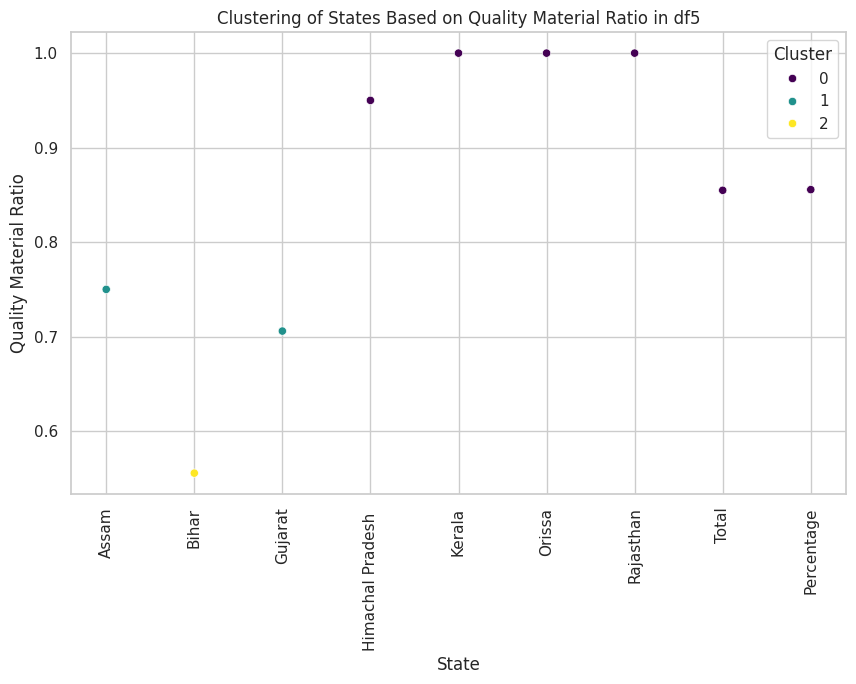

In [31]:
from sklearn.cluster import KMeans

# Define features for clustering in df5
X_df5 = df5[['quality_material_ratio']]

# Fit KMeans clustering on df5
kmeans_df5 = KMeans(n_clusters=3, random_state=42)
df5['Cluster'] = kmeans_df5.fit_predict(X_df5)

# Visualize clusters in df5
plt.figure(figsize=(10, 6))
sns.scatterplot(x='State', y='quality_material_ratio', hue='Cluster', data=df5, palette="viridis")
plt.title("Clustering of States Based on Quality Material Ratio in df5")
plt.xlabel("State")
plt.ylabel("Quality Material Ratio")
plt.xticks(rotation=90)
plt.show()


In [32]:
import joblib

# Save Random Forest model for df4
joblib.dump(rf_model_df4, "models/random_forest_df4.pkl")

# Save KMeans model for df5
joblib.dump(kmeans_df5, "models/kmeans_df5.pkl")


['models/kmeans_df5.pkl']

In [37]:
# preprocess_data.py
import pandas as pd
import numpy as np
import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans

def clean_column_names(df):
    df.columns = df.columns.str.strip().str.replace(" ", "_").str.replace("-", "_")
    return df
df5 = clean_column_names(pd.read_csv("datasets/Table_5_7.csv"))
df4 = clean_column_names(pd.read_csv("datasets/Table_4_1_a.csv"))
dfs = [df1, df2, df3, df4, df5, df6]
for i, df in enumerate(dfs, 1):
    df.fillna(df.median(numeric_only=True), inplace=True)
    print(f"DataFrame {i} processed with missing values filled.")
df4['compliance_ratio_1000_pop'] = df4['Habitations_with_1000+_Population___Habitations_Covered_(No.s)___Achievement'] / df4['Habitations_with_1000+_Population___Length_(KM)___Target']
df4['compliance_ratio_500_pop'] = df4['Habitations_with_500+_Population___Habitations_Covered_(No.)___Achievement'] / df4['Habitations_with_500+_Population___Habitations_Covered_(No.)___Target']
df4['Compliance_Level'] = np.where(df4['compliance_ratio_1000_pop'] > 0.8, 1, 0)

# Save preprocessed df4
df4.to_csv("datasets/Table_4_1_a_preprocessed.csv", index=False)

# Train and save Random Forest model on df4
X_df4 = df4[['compliance_ratio_1000_pop', 'compliance_ratio_500_pop']]
y_df4 = df4['Compliance_Level']
rf_model_df4 = RandomForestClassifier(random_state=42)
rf_model_df4.fit(X_df4, y_df4)
joblib.dump(rf_model_df4, "models/random_forest_df4.pkl")

# Load and preprocess df5

df5['quality_material_ratio'] = df5['Utilised_Tested_and_Quality_Materials'] / (
    df5['Utilised_Tested_and_Quality_Materials'] + df5['Not_utilised_Tested_and_Quality_Materials']
)

# Save preprocessed df5
df5.to_csv("datasets/Table_5_7_preprocessed.csv", index=False)

# Train and save KMeans model on df5
X_df5 = df5[['quality_material_ratio']]
kmeans_df5 = KMeans(n_clusters=3, random_state=42)
kmeans_df5.fit(X_df5)
joblib.dump(kmeans_df5, "models/kmeans_df5.pkl")


DataFrame 1 processed with missing values filled.
DataFrame 2 processed with missing values filled.
DataFrame 3 processed with missing values filled.
DataFrame 4 processed with missing values filled.
DataFrame 5 processed with missing values filled.
DataFrame 6 processed with missing values filled.


['models/kmeans_df5.pkl']